<a href="https://colab.research.google.com/github/kartikayladdha/BDT/blob/main/Lab%203/%20BigData_Dask_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Vidhi Kapoor - J021**
#**Kartikay Laddha - J025**

Installling the required packages

In [42]:
!pip install dask
!pip install graphviz

Importing the multiprocessing module 

In [43]:
import multiprocessing 
import os
def print_cube(num): 
    """ 
    function to print cube of given num 
    """
    print(os.getpid())
    print("Cube: {}".format(num * num * num)) 

def print_square(num): 
    """ 
    function to print square of given num 
    """
    print(os.getpid())
    print("Square: {}".format(num * num)) 

if __name__ == "__main__": 
    # creating processes 
    p1 = multiprocessing.Process(target=print_square, args=(10, )) 
    p2 = multiprocessing.Process(target=print_cube, args=(10, )) 

    # starting process 1 
    p1.start() 
    # starting process 2 
    p2.start() 

    # wait until process 1 is finished 
    p1.join() 
    # wait until process 2 is finished 
    p2.join() 

    # both processes finished 
    print("Done!") 


1581
Square: 100
1582
Cube: 1000
Done!


In [44]:
from time import sleep

def apply_discount(x):
    sleep(1)
    x = x - 0.3*x
    return x

def get_total(a,b):
    sleep(1)
    return a+b

def total_price(x,y):
    sleep(1)
    a = apply_discount(x)
    b = apply_discount(y)
    print(get_total(a,b))

In [45]:
%%time
a = apply_discount(1000)
b = apply_discount(1000)
get_total(a,b)

CPU times: user 145 ms, sys: 21.5 ms, total: 167 ms
Wall time: 3 s


In [46]:
import dask
from dask import delayed

x = delayed(apply_discount)(1000)
y = delayed(apply_discount)(4000)
z = delayed(total_price)(x, y)

z.visualize()


z.compute()

2450.0


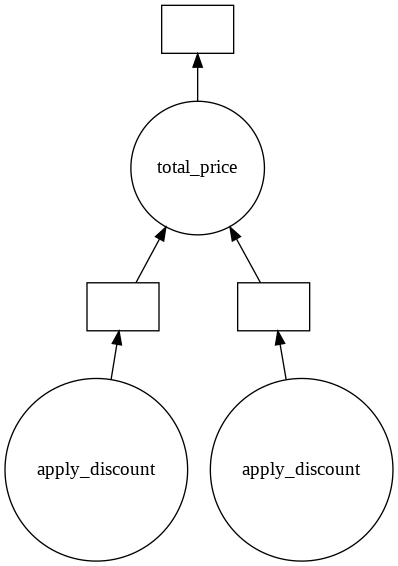

In [47]:
z.visualize()

In [48]:
# Functions to perform mathematics operations
def square(x):
    return x*x

def double(x):
    return x*2

def add(x, y):
    return x + y

# For loop that calls the above functions for each data
output = []
for i in range(6):
    a = delayed(square)(i)
    b = delayed(double)(i)
    c = delayed(add)(a, b)
    output.append(c)

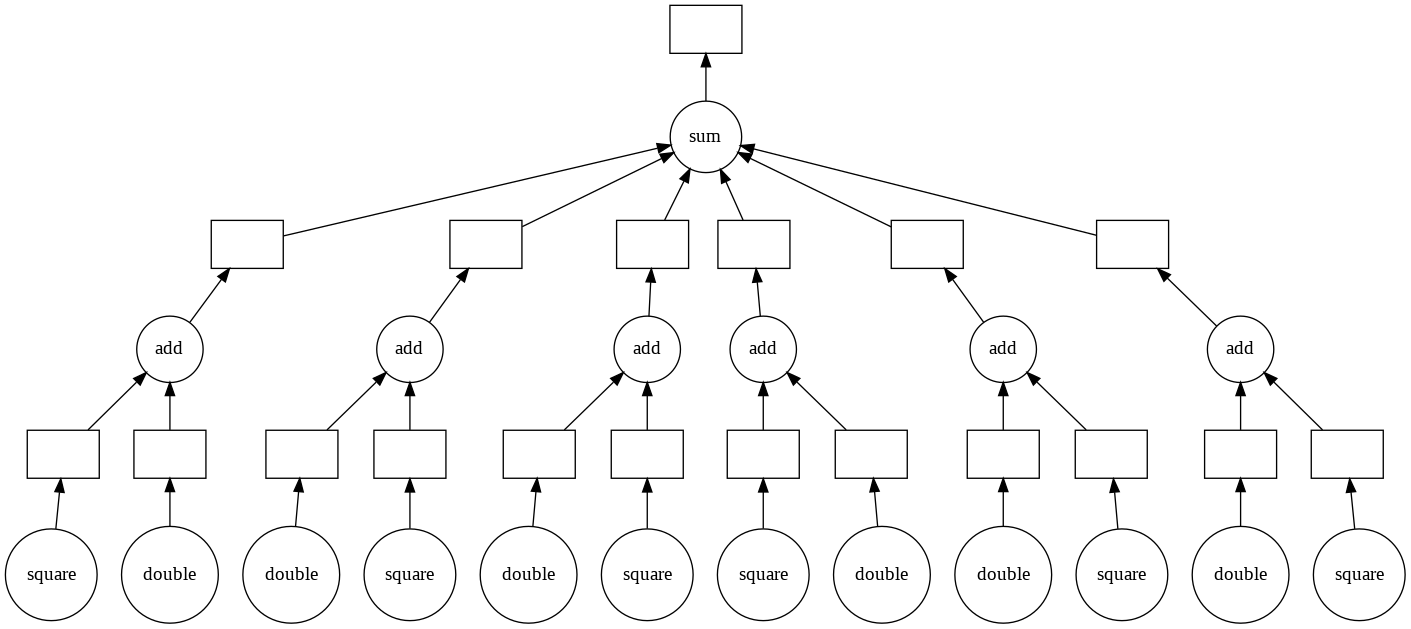

In [49]:
total = delayed(sum)(output)
total.visualize()

In [50]:
import concurrent

In [51]:
import multiprocessing
multiprocessing.cpu_count()

2

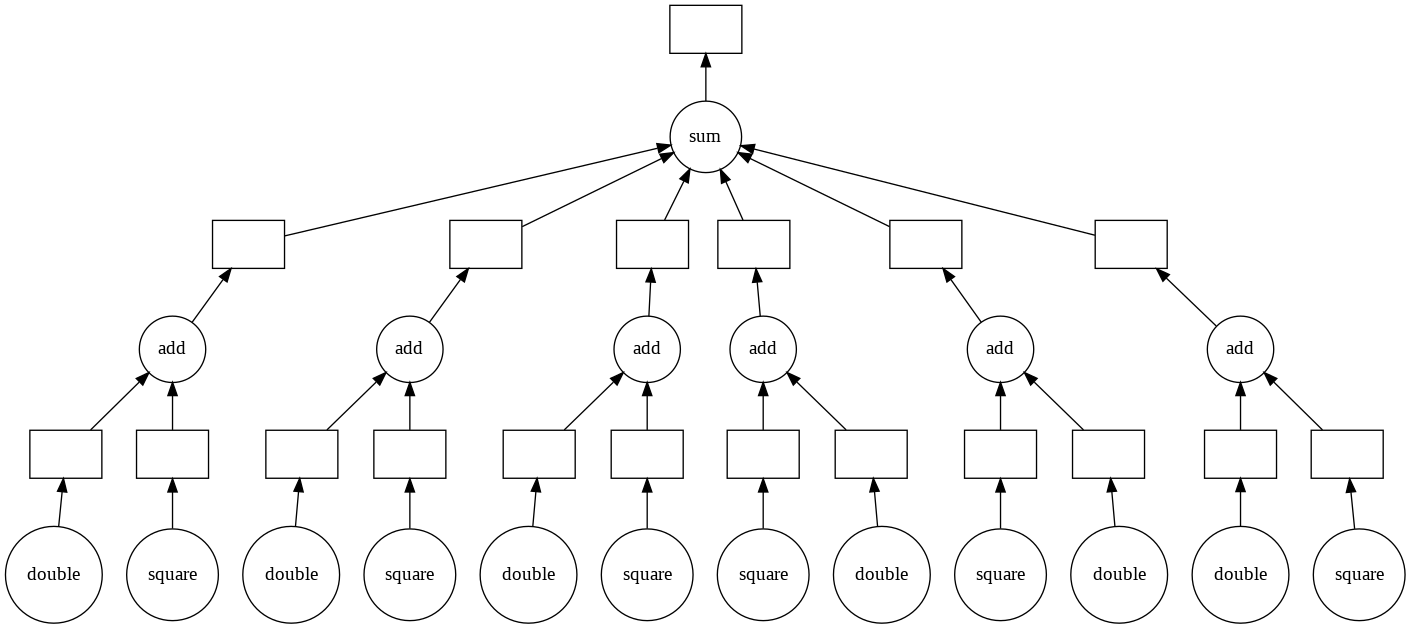

In [52]:
# Functions to perform mathematics operations
@delayed
def square(x):
    return x*x
@delayed
def double(x):
    return x*2
@delayed
def add(x, y):
    return x + y

# For loop that calls the above functions for each data
output = []
for i in range(6):
    a = square(i)
    b = double(i)
    c = add(a, b)
    output.append(c)

total = delayed(sum)(output)
total.visualize()

In [53]:
!pip install dask[dataframe]

In [54]:
import dask.dataframe as dd

In [55]:
dask.__version__

'2.12.0'

In [56]:
from dask.distributed import Client

In [ ]:
client = Client(processes = False)

/usr/local/lib/python3.7/dist-packages/distributed/bokeh/core.py:57: UserWarning: 
Failed to start diagnostics server on port 8787. [Errno 99] Cannot assign requested address
  warnings.warn('\n' + msg)
/usr/local/lib/python3.7/dist-packages/distributed/deploy/local.py:197: UserWarning: 
Could not launch service 'bokeh' on port 8787. Got the following message:

[Errno 99] Cannot assign requested address
  self.scheduler.start(scheduler_address)
distributed.worker - WARNING - Memory use is high but worker has no data to store to disk.  Perhaps some other process is leaking memory?  Process memory: 10.21 GB -- Worker memory limit: 13.65 GB


In [ ]:
client

Client Scheduler: inproc://172.28.0.2/57/1,Cluster Workers: 1 Cores: 2 Memory: 13.65 GB


distributed.worker - WARNING - Memory use is high but worker has no data to store to disk.  Perhaps some other process is leaking memory?  Process memory: 10.21 GB -- Worker memory limit: 13.65 GB


In [57]:
df = dask.datasets.timeseries()

In [58]:
df.head()

,id,name,x,y
timestamp,,,,
2000-01-01 00:00:00,994,Quinn,-0.138724,0.386235
2000-01-01 00:00:01,951,Laura,0.403941,-0.908881
2000-01-01 00:00:02,948,George,0.767104,0.841114
2000-01-01 00:00:03,973,Xavier,-0.490980,0.999437
2000-01-01 00:00:04,999,Edith,0.800266,0.540012


In [59]:
df1 = df.groupby('name').y.std()

In [60]:
df1

Dask Series Structure:
npartitions=1
    float64
        ...
Name: y, dtype: float64
Dask Name: sqrt, 67 tasks

In [61]:
df1.compute()

name
Alice       0.578243
Bob         0.576957
Charlie     0.577166
Dan         0.577378
Edith       0.578314
Frank       0.578055
George      0.578072
Hannah      0.577709
Ingrid      0.576300
Jerry       0.577009
Kevin       0.576343
Laura       0.579128
Michael     0.578133
Norbert     0.577279
Oliver      0.576759
Patricia    0.577299
Quinn       0.576207
Ray         0.576810
Sarah       0.577426
Tim         0.577879
Ursula      0.576725
Victor      0.577710
Wendy       0.576894
Xavier      0.578293
Yvonne      0.578617
Zelda       0.577967
Name: y, dtype: float64

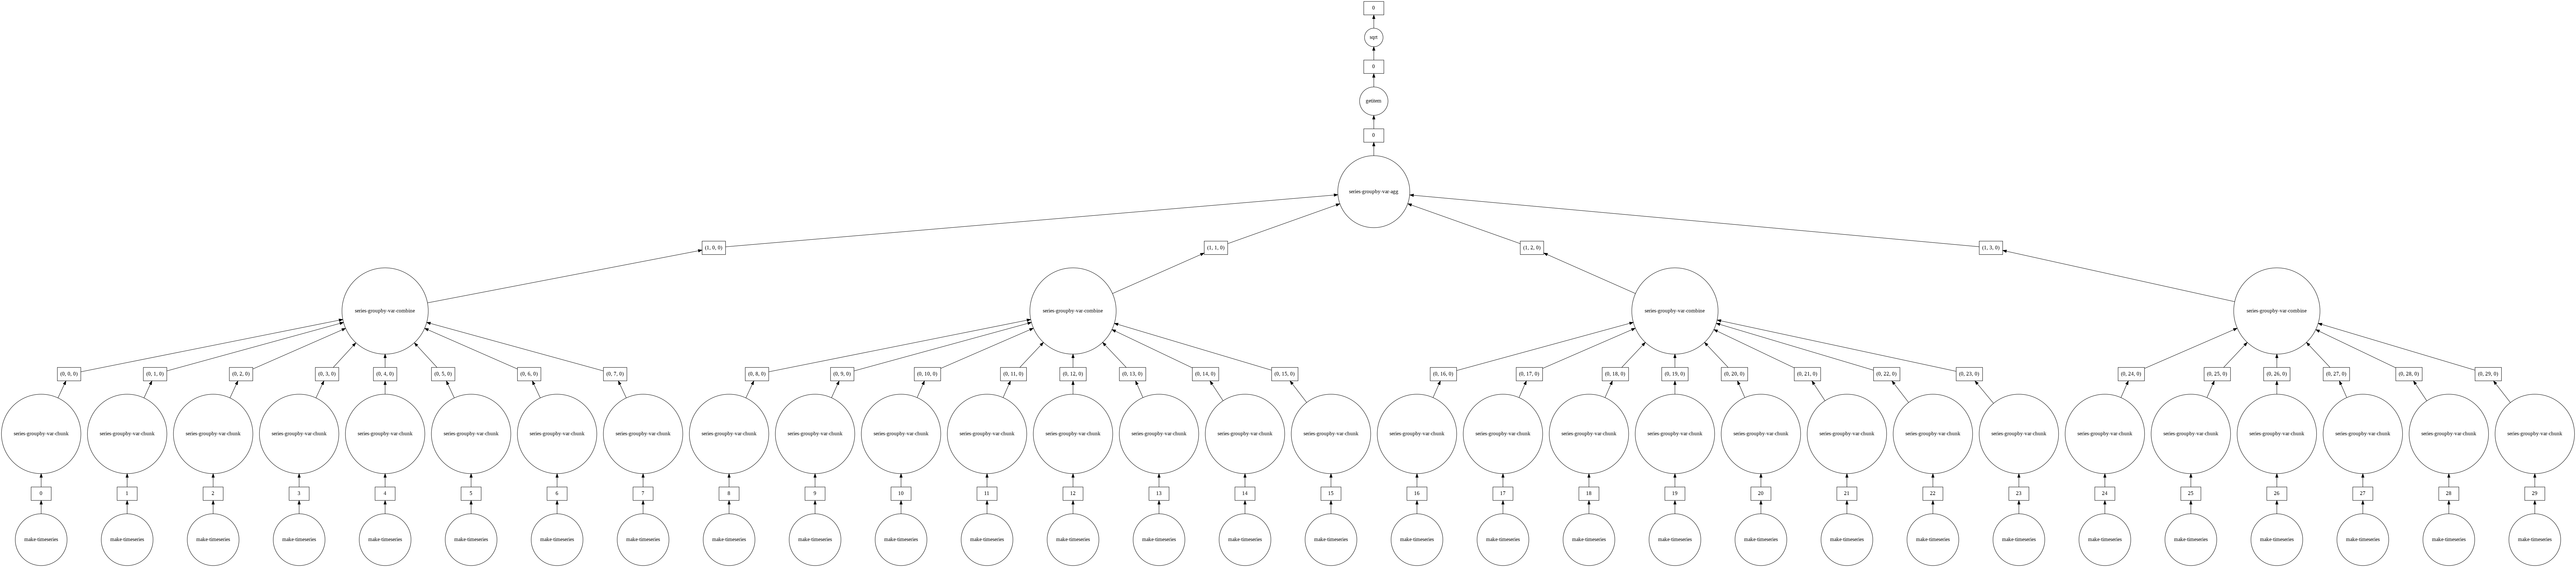

In [62]:
df1.visualize()

In [63]:
%time
df.loc['2000-01-01']

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


,id,name,x,y
npartitions=1,,,,
2000-01-01 00:00:00.000000000,int64,object,float64,float64
2000-01-01 23:59:59.999999999,...,...,...,...


In [64]:
df = df.persist()

In [65]:
%time
df.loc['2000-01-01'].compute()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs


,id,name,x,y
timestamp,,,,
2000-01-01 00:00:00,994,Quinn,-0.138724,0.386235
2000-01-01 00:00:01,951,Laura,0.403941,-0.908881
2000-01-01 00:00:02,948,George,0.767104,0.841114
2000-01-01 00:00:03,973,Xavier,-0.490980,0.999437
2000-01-01 00:00:04,999,Edith,0.800266,0.540012
...,...,...,...,...
2000-01-01 23:59:55,980,Bob,0.219053,-0.689884
2000-01-01 23:59:56,949,Tim,-0.645117,-0.625846
2000-01-01 23:59:57,955,Ursula,-0.050922,-0.419742


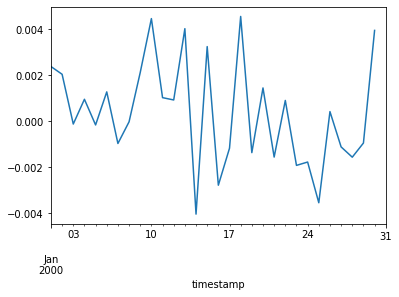

In [66]:
%matplotlib inline
df['y'].resample('24h').mean().compute().plot()

In [67]:
len(df)

2592000

In [68]:
from dask.distributed import Client
import pandas as pd
import time
import numpy as np

In [69]:
df = pd.DataFrame(np.random.random(size=(10000000, 4)),
                            columns=['param_a', 'param_b', 'param_c', 'param_d'])
df.head()

,param_a,param_b,param_c,param_d
0,0.335682,0.511902,0.021458,0.232776
1,0.019804,0.986981,0.064809,0.789383
2,0.029038,0.961866,0.940886,0.555179
3,0.866128,0.547014,0.541422,0.881971
4,0.744693,0.299888,0.558290,0.771923


In [70]:
def costly_simulation(list_param):
    time.sleep(3)
    return sum(list_param)

In [71]:
%%time
results = []
for col in df.columns:
    result = costly_simulation(df[col].values)
    results.append(result)

CPU times: user 7.72 s, sys: 111 ms, total: 7.83 s
Wall time: 19.1 s


In [72]:
results

[5001942.8149401685, 4999702.251767216, 4999468.138319405, 5000209.07409631]

In [73]:
import dask

In [74]:
%%time
results = []
for col in df.columns:
    result =dask.delayed(costly_simulation)(df[col].values)
    results.append(result)

CPU times: user 933 µs, sys: 0 ns, total: 933 µs
Wall time: 817 µs


Here we see that dask runs so much faster. With dask, it computed in 1.68 ms and without dask it took 7.45 seconds.

In [75]:
results[0]

Delayed('costly_simulation-48b770fa-af91-415a-865d-8e6835a73374')

In [76]:
%time dask.compute(*results)

CPU times: user 7.53 s, sys: 78.7 ms, total: 7.61 s
Wall time: 13.2 s


(5001942.8149401685, 4999702.251767216, 4999468.138319405, 5000209.07409631)